In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
train = pd.read_csv('train.csv',index_col= 'PassengerId')
train['Age'].dtype

dtype('float64')

In [8]:
train.shape
test = pd.read_csv('test.csv',index_col= 'PassengerId')
test.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.isnull().sum()
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
import missingno as mn
mn.matrix(train)

ModuleNotFoundError: No module named 'missingno'

In [13]:
# Data Preprocessing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy='median')
Age_2 = train['Age'].values.reshape(1,-1)
Age_2 = Age_2.T
Age_2 = imputer.fit_transform(Age_2)
train['Age_2'] = Age_2
train.head()

Age_test = test['Age'].values.reshape(1,-1)
Age_test = Age_test.T
Age_test = imputer.fit_transform(Age_test)
test['Age_2'] = Age_test
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_2
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [14]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age_2         0
dtype: int64

In [15]:
# Taking care of the embarked column
# lets see the values in Embarked column

train['Embarked'].value_counts() # As we see that 'S' value is very frequent, we replace the null with 'S'
train.Embarked.fillna('S',inplace = True)

In [16]:
#Any other missing value in test data set
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Age_2         0
dtype: int64

In [17]:
test['Fare'].fillna(test['Fare'].mean(),inplace = True)
#test.isnull().sum()

In [18]:
# We drop cabin column as it has nearly 80% in NA
print(train['Cabin'].isnull().sum()/len(train['Cabin']))
test['Cabin'].isnull().sum()/len(test['Cabin'])

0.7710437710437711


0.7822966507177034

In [19]:
train.drop(['Age','Cabin'], inplace = True, axis = 1)
test.drop(['Age','Cabin'], inplace = True, axis = 1)

In [20]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_2
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [21]:
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_2
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,62.0
895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,22.0


In [27]:
print(train.isnull().sum())
test.isnull().sum()
test['Age_2'] = test['Age_2'].round()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age_2       0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x24292919d08>,
 'caps': [<matplotlib.lines.Line2D at 0x2429293cb88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2429292c0c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2429293ce08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24292942c48>],
 'means': []}

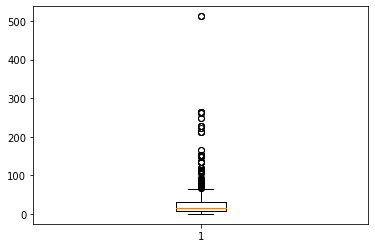

In [28]:
#train['Sex']= train['Sex'].apply(lambda x:0 if x == 'female' else 1)
#train['Sex']
plt.boxplot(train["Fare"])

In [20]:
#test['Sex']= test['Sex'].apply(lambda x:0 if x == 'female' else 1)
#test['Sex']

In [21]:
# Removing outliers
# So to detect outliers
# We use seaborn library here

train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_2
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [22]:
# we see that there is an outlier in fare that has to be removed
# so we dont consider any fare abover 400
train['Fare'].isnull().sum()

0

In [23]:
train = pd.get_dummies(train,columns  =['Sex','Embarked','Pclass'], drop_first = True)

In [24]:
train.head()

,Survived,Name,SibSp,Parch,Ticket,Fare,Age_2,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,22.0,1,0,1,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,38.0,0,0,0,0,0
3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,26.0,0,0,1,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,35.0,0,0,1,0,0
5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,35.0,1,0,1,0,1


In [39]:
#test = pd.get_dummies(test,columns  =['Sex','Embarked','Pclass'], drop_first = True)
test.isnull().sum()
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_2
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,62.0
895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,22.0


In [38]:
# Converting pandas into arrays to be used in ML algorithms
X_train = train.iloc[:,5:].values
y_train = train.iloc[:,0].values
x_test = test.iloc[:,5:].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

ValueError: could not convert string to float: 'A/4 48871'

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

score_l = []
score_rf =[]
score_svm = []

def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test) 

folds = StratifiedKFold(n_splits = 3)
for train_index,test_index in folds.split(X_train,y_train):
    X_train_1,y_train_1,X_test_1,y_test_1 = X_train[train_index],y_train[train_index],X_train[test_index],y_train[test_index]
    
    score_rf.append(get_score(RandomForestClassifier(n_estimators = 100),X_train_1,X_test_1,y_train_1,y_test_1))
    score_svm.append(get_score(SVC(),X_train_1,X_test_1,y_train_1,y_test_1))

print(score_l)
print(score_rf)
score_svm

[]
[0.7777777777777778, 0.8316498316498316, 0.797979797979798]


[0.622895622895623, 0.6632996632996633, 0.6734006734006734]

In [165]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 10)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [166]:
test.head()

,Name,SibSp,Parch,Ticket,Fare,Age_2,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
892,"Kelly, Mr. James",0,0,330911,7.8292,34.5,1,1,0,0,1
893,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,7.0000,47.0,0,0,1,0,1
894,"Myles, Mr. Thomas Francis",0,0,240276,9.6875,62.0,1,1,0,1,0
895,"Wirz, Mr. Albert",0,0,315154,8.6625,27.0,1,0,1,0,1
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,12.2875,22.0,0,0,1,0,1


In [167]:
x_test = test.iloc[:,4:].values

In [168]:
x_test

array([[ 7.8292, 34.5   ,  1.    , ...,  0.    ,  0.    ,  1.    ],
       [ 7.    , 47.    ,  0.    , ...,  1.    ,  0.    ,  1.    ],
       [ 9.6875, 62.    ,  1.    , ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 7.25  , 38.5   ,  1.    , ...,  1.    ,  0.    ,  1.    ],
       [ 8.05  , 27.    ,  1.    , ...,  1.    ,  0.    ,  1.    ],
       [22.3583, 27.    ,  1.    , ...,  0.    ,  0.    ,  1.    ]])

In [171]:
y_test = regressor.predict(x_test).round()

In [172]:
y_test

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [174]:
test.reset_index(level=0, inplace=True)

In [196]:
y_test_2 = pd.Series(y_test)
Final = pd.DataFrame(test['PassengerId'])
Final['Y_Test'] = y_test

In [197]:
Final.

,PassengerId,Y_Test
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0


In [198]:
Final.to_csv('Titanic_Own_1.csv', index=False)

In [200]:
test

,PassengerId,Name,SibSp,Parch,Ticket,Fare,Age_2,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",0,0,330911,7.8292,34.5,1,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,0,363272,7.0000,47.0,0,0,1,0,1
2,894,"Myles, Mr. Thomas Francis",0,0,240276,9.6875,62.0,1,1,0,1,0
3,895,"Wirz, Mr. Albert",0,0,315154,8.6625,27.0,1,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3101298,12.2875,22.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",0,0,A.5. 3236,8.0500,27.0,1,0,1,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",0,0,PC 17758,108.9000,39.0,0,0,0,0,0
415,1307,"Saether, Mr. Simon Sivertsen",0,0,SOTON/O.Q. 3101262,7.2500,38.5,1,0,1,0,1
416,1308,"Ware, Mr. Frederick",0,0,359309,8.0500,27.0,1,0,1,0,1
